### In this notebook
We showcase how to use the Analyzer class available in `../code/analyzer.py`

We will see how to:
- load data
- compute internet state and state duration
- get summary dataset
- plot time without internet service
- plot number of internet service interuptions
- print some reporting

In [1]:
import sys
sys.path.append("../code")

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from analyzer import Analyzer

mpl.rcParams.update({"font.size": 18})

In [2]:
PATH = "../inputs/time_recorded.csv.gzip"

- load data
- compute internet state and state duration

In [3]:
on_off_data = Analyzer.load_data(fp=PATH)
# on_off_data = on_off_data[on_off_data.index<="2020-08-11"] # Filter on date here
on_off_data = Analyzer.compute_state_and_duration(df=on_off_data)
display(on_off_data)

,on_off_ind,change_state_ind,change_state_tally,state_cum_duration
2020-07-26 18:24:00,1,0.0,0.0,0
2020-07-26 18:25:00,1,0.0,0.0,1
2020-07-26 18:26:00,1,0.0,0.0,2
2020-07-26 18:27:00,1,0.0,0.0,3
2020-07-26 18:28:00,1,0.0,0.0,4
...,...,...,...,...
2020-08-10 20:59:00,1,1.0,658.0,0
2020-08-10 21:00:00,0,1.0,659.0,0
2020-08-10 21:01:00,0,0.0,659.0,1
2020-08-10 21:02:00,0,0.0,659.0,2


- get summary dataset

In [4]:
freq = "12H" # "24H"
summary_data = Analyzer.get_summary_data(df=on_off_data, freq=freq)
display(summary_data)

,day_of_week,am_pm,number_interruptions,time_without_internet,avg_interruption_time
2020-07-27 AM,Monday,AM,1,5,5.000000
2020-07-27 PM,Monday,PM,2,13,6.500000
2020-07-28 AM,Tuesday,AM,3,22,7.333333
2020-07-28 PM,Tuesday,PM,3,67,22.333333
2020-07-29 AM,Wednesday,AM,1,88,88.000000
2020-07-29 PM,Wednesday,PM,8,53,6.625000
2020-07-30 AM,Thursday,AM,2,71,35.500000
2020-07-30 PM,Thursday,PM,4,339,84.750000
2020-07-31 AM,Friday,AM,2,13,6.500000
2020-07-31 PM,Friday,PM,6,39,6.500000


### Plot
- plot time without internet service

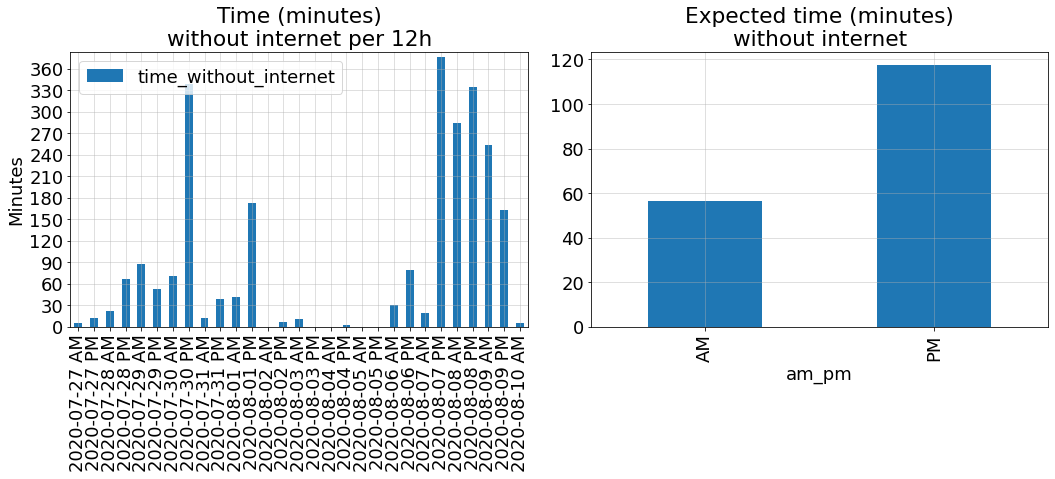

In [5]:
Analyzer.plot_time_without_internet(df=summary_data, show=True, save=False)

- plot number of internet service interuptions

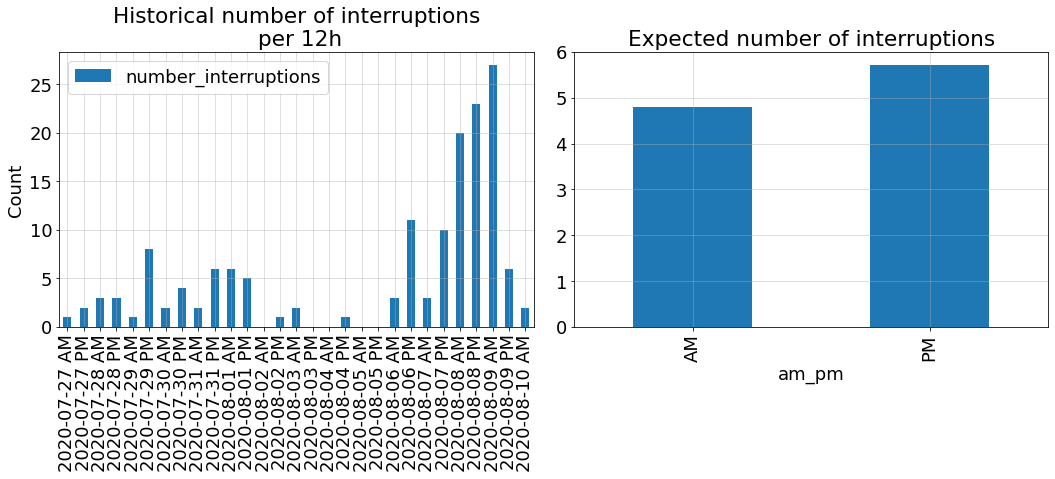

In [6]:
Analyzer.plot_number_of_interruptions(df=summary_data, show=True, save=False)

### Reporting
Most recent time without internet

In [7]:
print("0: Time when internet turned off\n1: Time when internet turned on")
on_off_data[on_off_data["state_cum_duration"]==2]["on_off_ind"].tail(20)

0: Time when internet turned off
1: Time when internet turned on


2020-08-10 07:08:00    1
2020-08-10 09:07:00    1
2020-08-10 10:34:00    0
2020-08-10 10:37:00    1
2020-08-10 16:46:00    1
2020-08-10 17:11:00    0
2020-08-10 17:16:00    1
2020-08-10 17:35:00    0
2020-08-10 17:46:00    0
2020-08-10 17:49:00    1
2020-08-10 18:13:00    1
2020-08-10 19:01:00    0
2020-08-10 19:18:00    1
2020-08-10 19:21:00    0
2020-08-10 19:29:00    0
2020-08-10 19:34:00    0
2020-08-10 19:40:00    0
2020-08-10 20:04:00    0
2020-08-10 20:51:00    0
2020-08-10 21:02:00    0
Name: on_off_ind, dtype: int64

Percentage of time down

In [8]:
Analyzer.reporting(on_off_data=on_off_data, summary_data=summary_data)

Internet has been down 11.45% of the time between 2020-07-27 AM and 2020-08-10 AM (15 days)
